# Feature Engineering 1

## <br>By Jean-Philippe Pitteloud</br>

### Requirements

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats.mstats import winsorize
%matplotlib inline

warnings.filterwarnings('ignore')

### Data Gathering

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing 
engine.dispose()

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?**

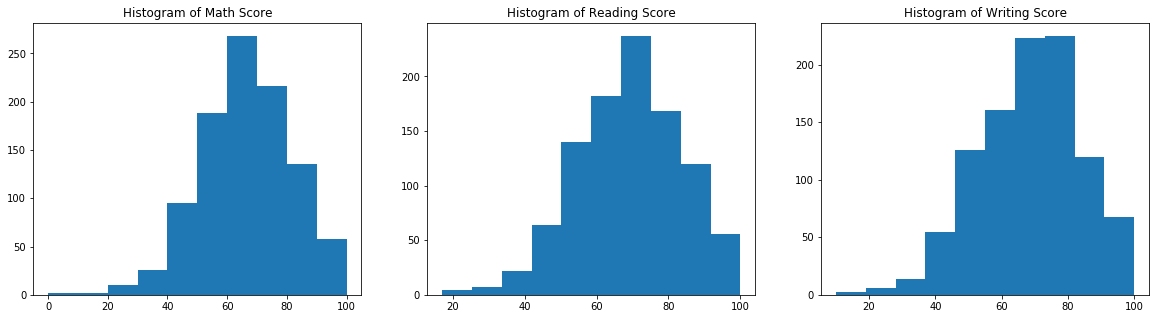

In [5]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
plt.hist(students_df["math score"])
plt.title("Histogram of Math Score")

plt.subplot(1, 3, 2)
plt.hist(students_df["reading score"])
plt.title("Histogram of Reading Score")

plt.subplot(1, 3, 3)
plt.hist(students_df["writing score"])
plt.title("Histogram of Writing Score");

As it can be seen in the plots above, the histograms for the three selected variables reflect distribution of values that are not normal and are left skewed. The calculated statistics displayed below confirmed the lack of normality in the variables

In [6]:
jb_math = jarque_bera(students_df["math score"])
norm_math = normaltest(students_df["math score"])

jb_read = jarque_bera(students_df["reading score"])
norm_read = normaltest(students_df["reading score"])

jb_write = jarque_bera(students_df["writing score"])
norm_write = normaltest(students_df["writing score"])

print("Math Score:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_math[0], jb_math[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_math[0], norm_math[1]))
print("\n")

print("Reading Score:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_read[0], jb_read[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_read[0], norm_read[1]))
print("\n")

print('Writing Score:')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_write[0], jb_write[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_write[0], norm_write[1]))

Math Score:
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836


Reading Score:
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582


Writing Score:
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


Before transforming the data to make it more normally distributed, a look into the summary statistics was necessary. While applying the Box-Cox transformation will have not present any issue for the variables 'reading score' and 'writing score', the '0' (zero) value in the variable 'math score' will prevent the transformation from occurring

In [7]:
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


To address this issue, the transformation of the 'math score' variable values was perfomed including value higher than '0' (zero)

In [8]:
math_boxcox,_ = boxcox(students_df[students_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(students_df["reading score"])
writing_boxcox,_ = boxcox(students_df["writing score"])

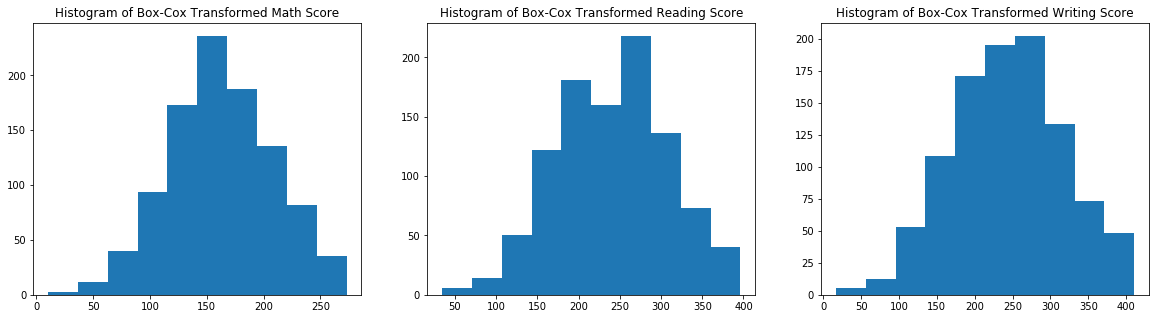

In [9]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("Histogram of Box-Cox Transformed Math Score")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("Histogram of Box-Cox Transformed Reading Score")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("Histogram of Box-Cox Transformed Writing Score");

As it can be seen in the series of plots presented above, the values in the variables selected looks more symmetrically distributed around the mean. Confirmation of the success of the applied transformation was obtain from the Jarque-Bera and Normal test, and the results are presented below. All three transformed variables may be considered normal with a 5% level of confidence

In [10]:
jb_box_math = jarque_bera(math_boxcox)
norm_box_math = normaltest(math_boxcox)

jb_box_read = jarque_bera(reading_boxcox)
norm_box_read = normaltest(reading_boxcox)

jb_box_write = jarque_bera(writing_boxcox)
norm_box_write = normaltest(writing_boxcox)

print("Math Score:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_box_math[0], jb_box_math[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_box_math[0], norm_box_math[1]))
print("\n")

print("Reading Score:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_box_read[0], jb_box_read[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_box_read[0], norm_box_read[1]))
print("\n")

print('Writing Score:')
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_box_write[0], jb_box_write[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_box_write[0], norm_box_write[1]))

Math Score:
Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037


Reading Score:
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467


Writing Score:
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


**2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed**

In [11]:
avg_score = (students_df["math score"] + students_df["reading score"] + students_df["writing score"])/3

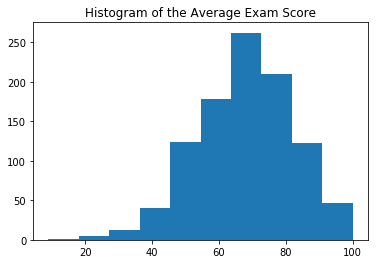

In [12]:
plt.hist(avg_score)
plt.title("Histogram of the Average Exam Score");

In [13]:
jb_avg_score = jarque_bera(avg_score)
norm_avg_score = normaltest(avg_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_avg_score[0], jb_avg_score[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_avg_score[0], norm_avg_score[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [14]:
avg_score_boxcox,_ = boxcox(avg_score)

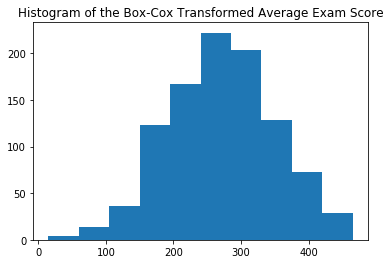

In [15]:
plt.hist(avg_score_boxcox)
plt.title("Histogram of the Box-Cox Transformed Average Exam Score");

In [16]:
jb_avg_score_boxcox = jarque_bera(avg_score_boxcox)
norm_avg_score_boxcox = normaltest(avg_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_avg_score_boxcox[0], jb_avg_score_boxcox[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_avg_score_boxcox[0], norm_avg_score_boxcox[1]))

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


**3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?**

In [17]:
students_df['avg_score'] = avg_score

In [18]:
students_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

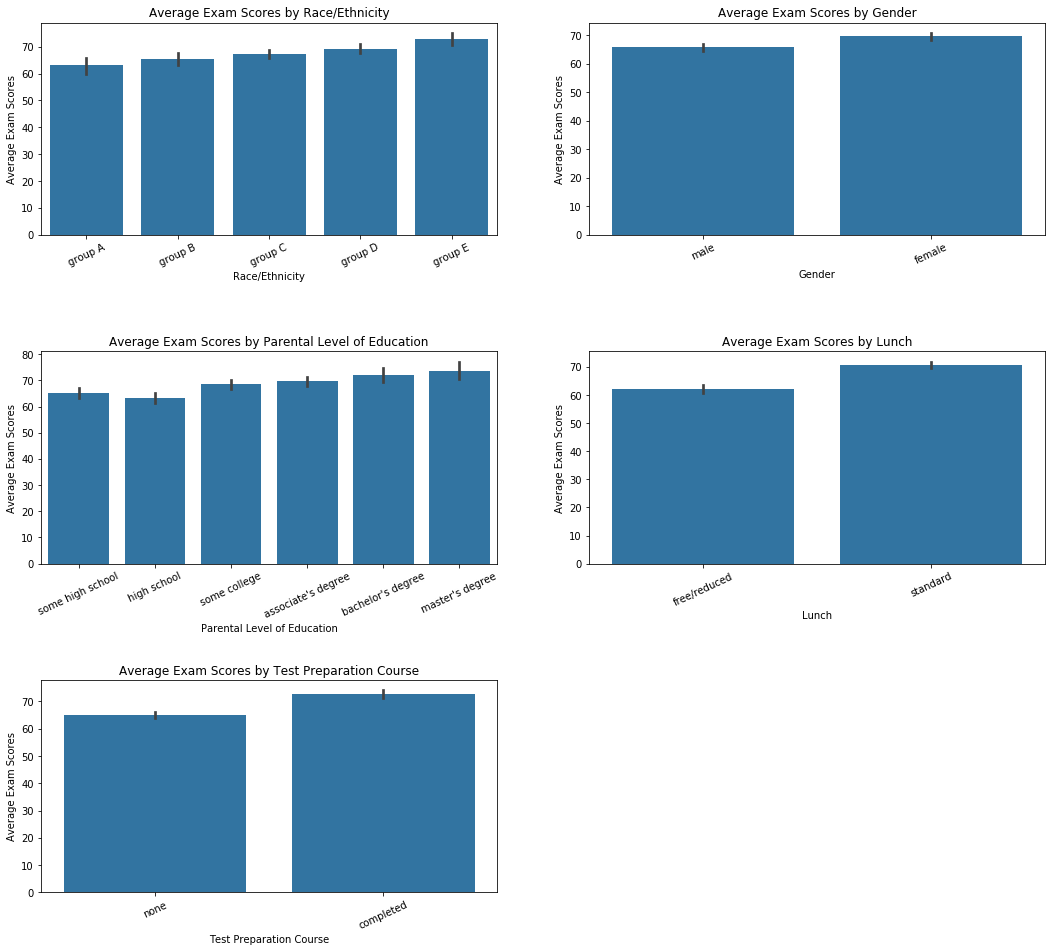

In [19]:
plt.figure(figsize = [18, 16])
plt.subplots_adjust(hspace = 0.55)
base_color = sns.color_palette()[0]

plt.subplot(3, 2, 1)
sns.barplot(data = students_df, x = "race/ethnicity", y = "avg_score", color = base_color, order = ['group A', 'group B', 'group C', 'group D', 'group E'])
plt.title("Average Exam Scores by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Exam Scores")
plt.xticks(rotation = 25)

plt.subplot(3, 2, 2)
sns.barplot(data = students_df, x = "gender", y = "avg_score", color = base_color, order = ['male', 'female'])
plt.title("Average Exam Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Exam Scores")
plt.xticks(rotation = 25)

plt.subplot(3, 2, 3)
sns.barplot(data = students_df, x = "parental level of education", y = "avg_score", color = base_color, order = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'])
plt.title("Average Exam Scores by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Exam Scores")
plt.xticks(rotation = 25)

plt.subplot(3, 2, 4)
sns.barplot(data = students_df, x = "lunch", y = "avg_score", color = base_color, order = ['free/reduced', 'standard'])
plt.title("Average Exam Scores by Lunch")
plt.xlabel("Lunch")
plt.ylabel("Average Exam Scores")
plt.xticks(rotation = 25)

plt.subplot(3, 2, 5)
sns.barplot(data = students_df, x = "test preparation course", y = "avg_score", color = base_color)
plt.title("Average Exam Scores by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Exam Scores")
plt.xticks(rotation = 25);

From the bivariate plots above, several conclusions can be drawn:

- The average score increases from group A to group E
- In terms of gender, female students tend to have higher average scores than the males
- There seems to be an important effect of the parental education level in the average scores
- The type of lunch also seems to have an impact in the average scores, however, this variable might be dependent on other variables with more clear and direct effects on the target variable
- On average, the students that completed the Preparation Course receive higher average scores than the students that did not complete it